In [47]:
import numpy as np
import pandas as pd
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [48]:
# use the style on ggplot2 - the grammar of graphics!
plt.style.use('ggplot')

#define figure size in (width, height) for all plots
plt.rcParams['figure.figsize'] = [10, 7]

In [49]:
# import CSV file: here the separator is a semi-colon
covid19_parts = pd.read_csv("Covid19Study_June2021.csv", sep = ";", 
                            dtype = {"ParticipantID":np.int32,"Age":np.int32,"Sex":np.str_,"Covid19":np.object_})

In [50]:
# see the first five observations
covid19_parts.head()

,ParticipantID,Age,Sex,Covid19
0,1,29,f,y
1,2,40,m,y
2,3,37,f,n
3,4,40,m,n
4,5,16,m,y


In [51]:
# specify types to be categories for Sex and Covid19
covid19_parts['Covid19'] = covid19_parts['Covid19'].astype("category")
covid19_parts['Sex'] = covid19_parts['Sex'].astype("category")

In [52]:
# confirm the data types
covid19_parts.dtypes

ParticipantID       int32
Age                 int32
Sex              category
Covid19          category
dtype: object

## Task read in the data make use of Ipywidgets

In [53]:
samplerate, data = wavfile.read("Recordings/RecordingParticipant1.wav")

length = data.shape[0] / samplerate

print(f"length = {length}s")
print(f"length = {samplerate}s")

length = 0.9070294784580499s
length = 44100s


In [54]:
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data, label="first participant cough")

plt.legend()

plt.xlabel("Time [s]")

plt.ylabel("Amplitude")

plt.show()

## Task plot a histogram attribute covid19

In [55]:
plt.hist(x=covid19_parts["Covid19"], orientation="horizontal", color=["blue"])

plt.title("Count of people with Covid 19 y(yes) and n (no)")

plt.ylabel("Covid19 status count")

plt.show()

Interpretation: Equal number of participants of people who either have COVID or not.

## Task plot a histogram attribute Age: For the “Age” histogram use the three intervals 0-30, or 31-50 or >50

<IPython.core.display.Javascript object>


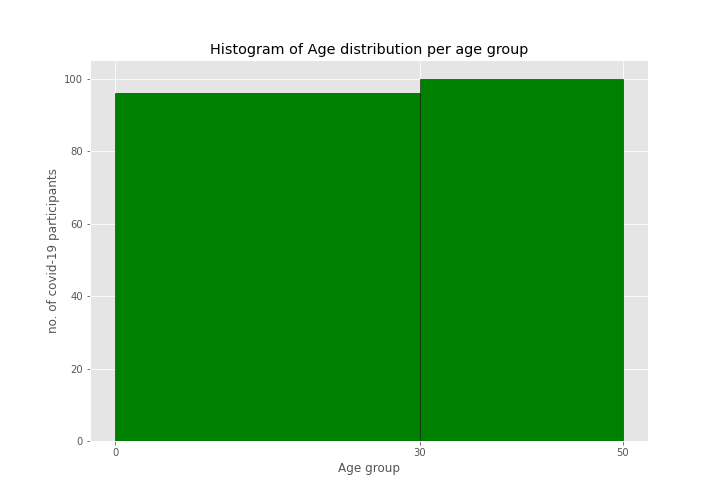

In [56]:
#https://www.tutorialspoint.com/matplotlib/matplotlib_histogram.htm
# this is incorrect
fig,ax = plt.subplots(1,1)
ax.hist(covid19_parts['Age'], bins = [0,30,50], edgecolor="black", color=["green"])
ax.set_title("Histogram of Age distribution per age group")
ax.set_xticks([0,30,50])
ax.set_xlabel('Age group')
ax.set_ylabel('no. of covid-19 participants')
plt.show()

In [57]:
ages

0      29
1      40
2      37
3      40
4      16
       ..
195    20
196    33
197    27
198    49
199    31
Name: Age, Length: 200, dtype: int32

In [58]:
#%matplotlib notebook

[ 96 100   4]


<IPython.core.display.Javascript object>


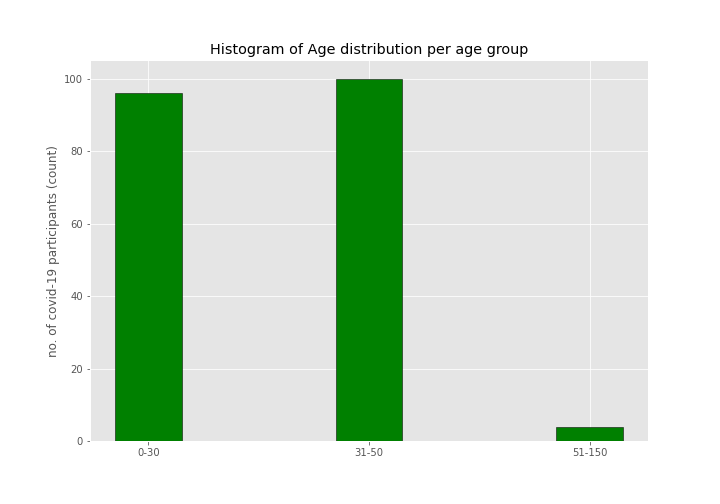

Text(0, 0.5, 'no. of covid-19 participants (count)')

In [65]:
# subset the age column
ages = covid19_parts['Age']

# use numpy histogram to create the histogram
hist_range =np.histogram(ages,[0,30,50,150])

# extract values from the hist_range 
hist_range = hist_range[0]

# get index values
x = np.arange(len(hist_range))

print(hist_range)

# what the age groups that we need to define
agegroups = ['0-30', '31-50', '51-150']

# create a figure and axis for plt.subplot
fig, ax = plt.subplots()

# define plot x,y, height, xlabel and color
rects1 = ax.bar(x,hist_range, 0.3, label="Age Groups", color="green", edgecolor="black")

# setting aesthetics
ax.set_xticks(x)
ax.set_xticklabels(agegroups)
ax.set_title("Histogram of Age distribution per age group")
ax.set_ylabel('no. of covid-19 participants (count)')

Interpretation: They are more people who participated whose age ranges between 30-50.

## Task Create a single plot with horizontal axis representing the sampling instants 0,1,…,8191 and that contains four curves. These curves should represent the last 8192 audio samples of the recordings for the first four participants listed in Covid19Study_June2021.csv.

In [60]:
# multiple plots in one for the first 4 participants
# see the first 4 part
covid19_parts.iloc[0:4]

,ParticipantID,Age,Sex,Covid19
0,1,29,f,y
1,2,40,m,y
2,3,37,f,n
3,4,40,m,n


In [61]:
sample_rate1,participant1_data = wavfile.read("Recordings/RecordingParticipant1.wav")
sample_rate2,participant2_data = wavfile.read("Recordings/RecordingParticipant2.wav")
sample_rate3,participant3_data = wavfile.read("Recordings/RecordingParticipant3.wav")
sample_rate4,participant4_data = wavfile.read("Recordings/RecordingParticipant4.wav")

In [62]:
length1 = participant1_data.shape[0] / sample_rate1
length2 = participant2_data.shape[0] / sample_rate2
length3 = participant3_data.shape[0] / sample_rate3
length4 = participant4_data.shape[0] / sample_rate4

In [63]:
time1 = np.linspace(0., length1, participant1_data.shape[0])
time2 = np.linspace(0., length2, participant2_data.shape[0])
time3 = np.linspace(0., length3, participant3_data.shape[0])
time4 = np.linspace(0., length4, participant4_data.shape[0])

<IPython.core.display.Javascript object>


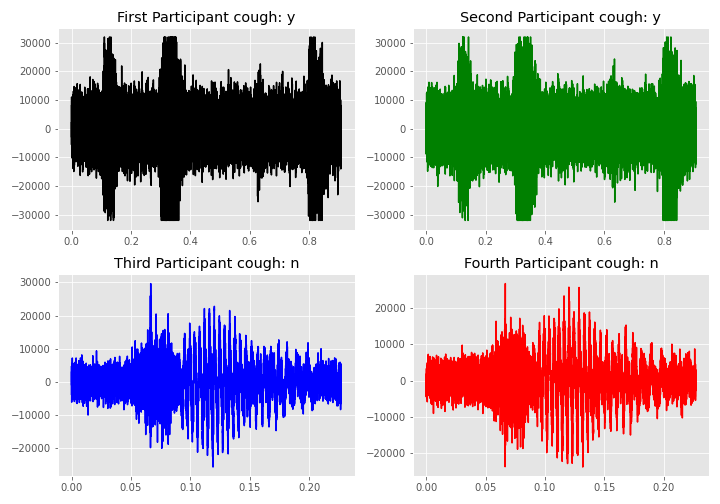

In [68]:
# adjust plot features
fig,ax = plt.subplots(nrows=2,ncols=2)
ax[0,0].plot(time1, participant1_data, color="black")
ax[0,1].plot(time2, participant2_data, color = "green")
ax[1,0].plot(time3, participant3_data, color = "blue")
ax[1,1].plot(time4, participant4_data, color = "red")

ax[0, 0].set_title('First Participant cough: {}'.format(covid19_parts.Covid19.iloc[0]))
ax[0, 1].set_title('Second Participant cough: {}'.format(covid19_parts.Covid19.iloc[1]))
ax[1, 0].set_title('Third Participant cough: {}'.format(covid19_parts.Covid19.iloc[2]))
ax[1, 1].set_title('Fourth Participant cough: {}'.format(covid19_parts.Covid19.iloc[3]))


plt.tight_layout()

Interpretation: There seems to be a pattern with the participants who have covid 19. At least for the first 4 participants.